In [1]:
# !pip install https://github.com/JamesRitchie/scikit-rvm/archive/master.zip

In [2]:
import numpy as np
import pandas as pd 
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit,LeaveOneOut,KFold
from imblearn.over_sampling import SMOTE
from skrvm import RVC
import matplotlib.pyplot as plt
import extract_vector as ev

In [3]:
arousal_dataset = pickle.load(open("../Dataset/FusedData/FusedAllData.pkl","rb"))
arousal_label = ev.getLabelData(type="arousal")

valence_dataset = pickle.load(open("../Dataset/FusedData/FusedAllData.pkl","rb"))
valence_label = ev.getLabelData(type="valence")

dominance_dataset = pickle.load(open("../Dataset/FusedData/FusedAllData.pkl","rb"))
dominance_label = ev.getLabelData(type="dominance")

liking_dataset = pickle.load(open("../Dataset/FusedData/FusedAllData.pkl","rb"))
liking_label = ev.getLabelData(type="liking")

In [4]:
arousal_dataset = arousal_dataset.astype(float)
arousal_label = arousal_label.astype(float)

valence_dataset = valence_dataset.astype(float)
valence_label = valence_label.astype(float)

dominance_dataset = dominance_dataset.astype(float)
dominance_label = dominance_label.astype(float)

liking_dataset = liking_dataset.astype(float)
liking_label = liking_label.astype(float)

In [5]:
def getLabel(label):
    new_label=[]
    for i in range(len(label)):
        if(label[i][0]>=4.5):
            new_label.append(1)
        else:
            new_label.append(0)
    return new_label

In [6]:
# clean data
def clean_data(dataset, target):
    del_rows = []
    for i in range(len(dataset)):
        if(np.isnan(dataset[i]).sum() > 0):
            del_rows.append(i)
            
    dataset = np.delete(dataset, del_rows, axis=0)
    target = np.delete(target, del_rows, axis=0)
    
    return dataset,target

In [7]:
arousal_dataset,arousal_label = clean_data(arousal_dataset,arousal_label)
valence_dataset,valence_label = clean_data(valence_dataset,valence_label)
dominance_dataset ,dominance_label = clean_data(dominance_dataset,dominance_label)
liking_dataset,liking_label = clean_data(liking_dataset,liking_label)

In [8]:
arousal_label = getLabel(arousal_label)
valence_label = getLabel(valence_label)
dominance_label = getLabel(dominance_label)
liking_label = getLabel(liking_label)

In [9]:
print(arousal_dataset.shape)

(755, 126)


In [10]:
sm1 = SMOTE()
arousal_dataset,arousal_label = sm1.fit_resample(arousal_dataset,arousal_label)

sm2 = SMOTE()
valence_dataset,valence_label = sm2.fit_resample(valence_dataset,valence_label)

sm3 = SMOTE()
dominance_dataset,dominance_label = sm3.fit_resample(dominance_dataset,dominance_label)

sm4 = SMOTE()
liking_dataset,liking_label = sm4.fit_resample(liking_dataset,liking_label)

In [11]:
sc = StandardScaler()

arousal_dataset = sc.fit_transform(arousal_dataset)
valence_dataset = sc.fit_transform(valence_dataset)
dominance_dataset = sc.fit_transform(dominance_dataset)
liking_dataset = sc.fit_transform(liking_dataset)

In [12]:
pca = PCA(n_components=0.95)

arousal_dataset = pca.fit_transform(arousal_dataset)
valence_dataset = pca.fit_transform(valence_dataset)
dominance_dataset = pca.fit_transform(dominance_dataset)
liking_dataset = pca.fit_transform(liking_dataset)

In [13]:
ar_model = RVC()
val_model = RVC()
dom_model=RVC()
lik_model=RVC()

In [14]:
x_a_train,x_a_test,y_a_train,y_a_test = train_test_split(arousal_dataset,arousal_label,test_size=0.2,random_state=42)
x_v_train,x_v_test,y_v_train,y_v_test = train_test_split(valence_dataset,valence_label,test_size=0.2,random_state=42)
x_d_train,x_d_test,y_d_train,y_d_test = train_test_split(dominance_dataset,dominance_label,test_size = 0.3,random_state = 42)
x_l_train,x_l_test,y_l_train,y_l_test = train_test_split(liking_dataset,liking_label,test_size = 0.3,random_state = 42)

# Arousal

In [15]:
ar_model.fit(x_a_train,np.array(y_a_train))

RVC(alpha=1e-06, beta=1e-06, beta_fixed=False, bias_used=True, coef0=0.0,
    coef1=None, degree=3, kernel='rbf', n_iter=3000,
    threshold_alpha=1000000000.0, tol=0.001, verbose=False)

In [16]:
pred_a = ar_model.predict(x_a_test)
print(classification_report(y_a_test,pred_a))

              precision    recall  f1-score   support

           0       0.85      0.64      0.73       100
           1       0.73      0.90      0.80       108

    accuracy                           0.77       208
   macro avg       0.79      0.77      0.77       208
weighted avg       0.79      0.77      0.77       208



In [17]:
confusion_matrix(y_a_test,pred_a)

array([[64, 36],
       [11, 97]], dtype=int64)

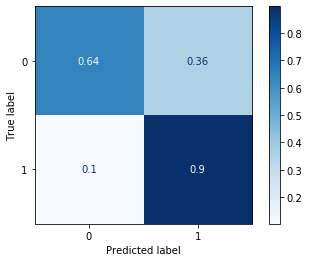

In [18]:
plot_confusion_matrix(ar_model,x_a_test,y_a_test,normalize='true',cmap=plt.cm.Blues)

In [19]:
print(accuracy_score(pred_a,y_a_test))

0.7740384615384616


### K Fold Cross Validation:-

In [20]:
# cvkfold = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
# cross_val_score(ar_model,arousal_dataset,np.array(arousal_label),scoring='accuracy',cv=cvkfold).mean()*100

### Leave One Out Cross Validation:-

In [21]:
# loo = LeaveOneOut()
# no_splits=loo.get_n_splits(arousal_dataset)
# no_splits

In [22]:
# cvloocv=ShuffleSplit(n_splits=no_splits,test_size=0.3,random_state=42)
# cross_val_score(ar_model,arousal_dataset,np.array(arousal_label),scoring='accuracy',cv=cvloocv).mean()*100

# Valence 

In [23]:
val_model.fit(x_v_train,np.array(y_v_train))

RVC(alpha=1e-06, beta=1e-06, beta_fixed=False, bias_used=True, coef0=0.0,
    coef1=None, degree=3, kernel='rbf', n_iter=3000,
    threshold_alpha=1000000000.0, tol=0.001, verbose=False)

In [24]:
pred_v = val_model.predict(x_v_test)
print(classification_report(y_v_test,pred_v))

              precision    recall  f1-score   support

           0       0.74      0.55      0.63       108
           1       0.51      0.71      0.60        73

    accuracy                           0.61       181
   macro avg       0.63      0.63      0.61       181
weighted avg       0.65      0.61      0.62       181



In [25]:
confusion_matrix(y_v_test,pred_v)

array([[59, 49],
       [21, 52]], dtype=int64)

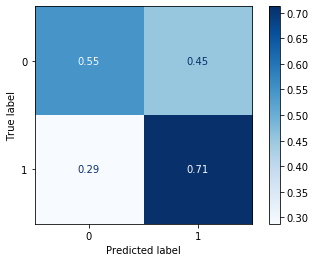

In [26]:
plot_confusion_matrix(val_model,x_v_test,y_v_test,normalize='true',cmap=plt.cm.Blues)

In [27]:
print(accuracy_score(pred_v,y_v_test))

0.6132596685082873


### K Fold Cross Validation:-

In [28]:
# cvkfold = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
# cross_val_score(val_model,valence_dataset,valence_label,scoring='accuracy',cv=cvkfold).mean()*100

###  Leave One Out Cross Validation:-

In [29]:
# loo = LeaveOneOut()
# no_splits=loo.get_n_splits(valence_dataset)
# no_splits

In [30]:
# cvloocv=ShuffleSplit(n_splits=no_splits,test_size=0.3,random_state=42)
# cross_val_score(val_model,valence_dataset,valence_label,scoring='accuracy',cv=cvloocv).mean()*100

# Dominance

In [31]:
dom_model.fit(x_d_train,np.array(y_d_train))

RVC(alpha=1e-06, beta=1e-06, beta_fixed=False, bias_used=False, coef0=0.0,
    coef1=None, degree=3, kernel='rbf', n_iter=3000,
    threshold_alpha=1000000000.0, tol=0.001, verbose=False)

In [32]:
pred_d = dom_model.predict(x_d_test)
print(classification_report(y_d_test,pred_d))

              precision    recall  f1-score   support

           0       0.57      0.61      0.59       120
           1       0.59      0.56      0.58       123

    accuracy                           0.58       243
   macro avg       0.58      0.58      0.58       243
weighted avg       0.58      0.58      0.58       243



In [33]:
confusion_matrix(y_d_test,pred_d)

array([[73, 47],
       [54, 69]], dtype=int64)

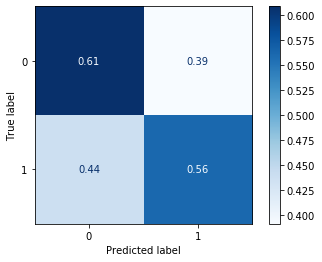

In [34]:
plot_confusion_matrix(dom_model,x_d_test,y_d_test,normalize='true',cmap=plt.cm.Blues)

In [35]:
print(accuracy_score(pred_d,y_d_test))

0.5843621399176955


# Liking

In [36]:
lik_model.fit(x_l_train,np.array(y_l_train))

RVC(alpha=1e-06, beta=1e-06, beta_fixed=False, bias_used=True, coef0=0.0,
    coef1=None, degree=3, kernel='rbf', n_iter=3000,
    threshold_alpha=1000000000.0, tol=0.001, verbose=False)

In [37]:
pred_l = lik_model.predict(x_l_test)
print(classification_report(y_l_test,pred_l))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       165
           1       0.75      0.83      0.79       163

    accuracy                           0.78       328
   macro avg       0.78      0.78      0.78       328
weighted avg       0.78      0.78      0.78       328



In [38]:
confusion_matrix(y_l_test,pred_l)

array([[121,  44],
       [ 28, 135]], dtype=int64)

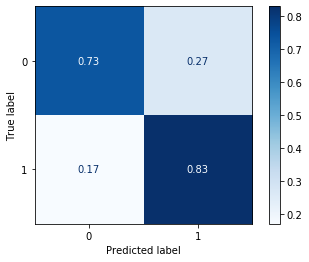

In [39]:
plot_confusion_matrix(lik_model,x_l_test,y_l_test,normalize='true',cmap=plt.cm.Blues)

In [40]:
print(accuracy_score(pred_l,y_l_test))

0.7804878048780488
